In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from joblib import dump


In [3]:
X_train = pd.read_csv("../../../Split Data/Training Dataset/X_train #1.csv").drop(columns=["Unnamed: 0"])
y_train = pd.read_csv("../../../Split Data/Training Dataset/y_train #1.csv", index_col=0)
X_val = pd.read_csv("../../../Split Data/Validation Dataset/X_val #1.csv").drop(columns=["Unnamed: 0"])
y_val = pd.read_csv("../../../Split Data/Validation Dataset/y_val #1.csv", index_col=0)
X_test = pd.read_csv("../../../Split Data/Testing Dataset/X_test #1.csv").drop(columns=["Unnamed: 0"])
y_test = pd.read_csv("../../../Split Data/Testing Dataset/y_test #1.csv", index_col=0)

In [4]:
model = XGBClassifier(objective='binary:logistic', max_depth = 3, n_estimators = 1000, early_stopping_rounds=5,)

In [5]:
model.fit(X_train, y_train,  verbose = True, eval_set=[(X_val,y_val)])

[0]	validation_0-logloss:0.46840
[1]	validation_0-logloss:0.44075
[2]	validation_0-logloss:0.42143
[3]	validation_0-logloss:0.40938
[4]	validation_0-logloss:0.39937
[5]	validation_0-logloss:0.39226
[6]	validation_0-logloss:0.38693
[7]	validation_0-logloss:0.37674
[8]	validation_0-logloss:0.37198
[9]	validation_0-logloss:0.36893
[10]	validation_0-logloss:0.36257
[11]	validation_0-logloss:0.35683
[12]	validation_0-logloss:0.35423
[13]	validation_0-logloss:0.35234
[14]	validation_0-logloss:0.34882
[15]	validation_0-logloss:0.34698
[16]	validation_0-logloss:0.34461
[17]	validation_0-logloss:0.34370
[18]	validation_0-logloss:0.34246
[19]	validation_0-logloss:0.34100
[20]	validation_0-logloss:0.34031
[21]	validation_0-logloss:0.33944
[22]	validation_0-logloss:0.33845
[23]	validation_0-logloss:0.33792
[24]	validation_0-logloss:0.33733
[25]	validation_0-logloss:0.33677
[26]	validation_0-logloss:0.33571
[27]	validation_0-logloss:0.33511
[28]	validation_0-logloss:0.33473
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [6]:
y_pred = model.predict(X_test)

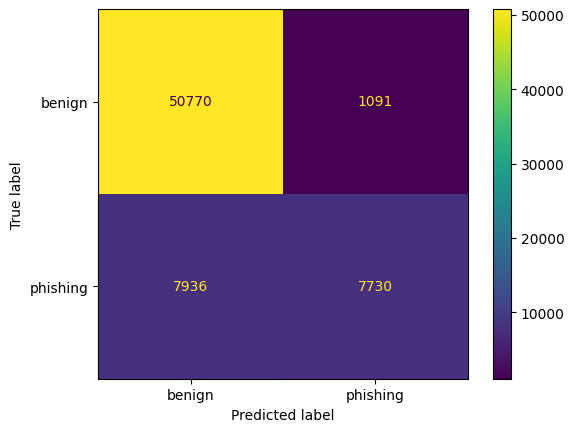

In [7]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["benign", "phishing"])                            
matrix.plot()

In [8]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
F1_score = metrics.f1_score(y_test, y_pred)

In [9]:
print({"Accuracy":Accuracy,"Precision":Precision,"Recall":Recall,"F1_score":F1_score})

{'Accuracy': 0.8663201386112221, 'Precision': 0.8763178777916336, 'Recall': 0.4934252521383889, 'F1_score': 0.6313554130763263}


In [10]:
df = pd.read_csv("../Metrics of Dataset #1.csv")

In [11]:
metrics = pd.DataFrame({"Model": "XGBoost", "Accuracy": [Accuracy], "Precision":[Precision], "Recall": [Recall], "F1_score": [F1_score]})

In [12]:
df = pd.concat([df, metrics], ignore_index=True)

In [13]:
df.head()

,Model,Accuracy,Precision,Recall,F1_score
0,LinearSVC,0.796748,0.840168,0.153007,0.258869
1,Random Forest,0.870289,0.872345,0.516469,0.648811
2,XGBoost,0.866320,0.876318,0.493425,0.631355


In [14]:
df.to_csv("../Metrics of Dataset #1.csv", index=False)

In [15]:
dump(model, 'XGBoost #1.joblib')

['XGBoost #1.joblib']